+----------------+----------------------+----------------------+
| Input Size (n) | Recursive Time (ms)  | Iterative Time (ms)  |
+----------------+----------------------+----------------------+
|      100       | 0.029706954956054688 | 0.01125335693359375  |
|      200       | 0.10187625885009766  | 0.020956993103027344 |
|      400       | 0.14696121215820312  | 0.04127025604248047  |
|      600       | 0.20117759704589844  | 0.061392784118652344 |
|      800       | 0.26776790618896484  | 0.08358955383300781  |
|      1000      |  0.3751993179321289  |  0.113677978515625   |
+----------------+----------------------+----------------------+


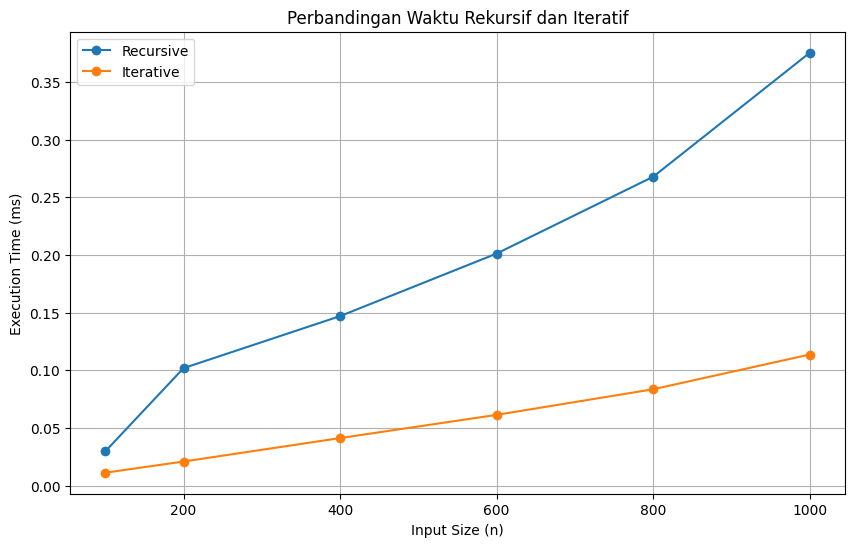

In [ ]:
# SD0402
# Hafshoh Imratun Naila/2311110056
# Grahen Maryam Rompas Bashiran/2311110062


# Import library yang diperlukan
import time
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import sys

# Meningkatkan batas rekursi jika diperlukan
sys.setrecursionlimit(2000)

# Fungsi Rekursif untuk simulasi waktu
def recursive_time(n):
    if n == 0:
        return 0
    else:
        return n + recursive_time(n - 1)

# Fungsi Iteratif untuk simulasi waktu
def iterative_time(n):
    total = 0
    for i in range(1, n + 1):
        total += i
    return total

# Fungsi untuk mengukur waktu eksekusi dengan rata-rata dari beberapa percobaan (dalam ms)
def measure_execution_time(values, repetitions=10):
    recursive_times = []
    iterative_times = []

    for n in values:
        # Rekursif
        if n < sys.getrecursionlimit():
            rec_time = []
            for _ in range(repetitions):
                start_time = time.time()
                recursive_time(n)
                rec_time.append((time.time() - start_time) * 1e3)  # Konversi ke ms
            recursive_times.append(np.mean(rec_time))
        else:
            recursive_times.append(None)  # Tidak dihitung jika melebihi batas rekursi

        # Iteratif
        iter_time = []
        for _ in range(repetitions):
            start_time = time.time()
            iterative_time(n)
            iter_time.append((time.time() - start_time) * 1e3)  # Konversi ke ms
        iterative_times.append(np.mean(iter_time))

    return recursive_times, iterative_times

# Variasi nilai untuk analisis kompleksitas
values = [100, 200, 400, 600, 800, 1000]

# Hitung waktu eksekusi (dalam ms)
recursive_times, iterative_times = measure_execution_time(values)

# Menampilkan hasil dalam tabel (dalam ms)
table = PrettyTable()
table.field_names = ["Input Size (n)", "Recursive Time (ms)", "Iterative Time (ms)"]
for i in range(len(values)):
    table.add_row([values[i], recursive_times[i], iterative_times[i]])
print(table)

# Visualisasi perbandingan waktu eksekusi
plt.figure(figsize=(10, 6))
if any(recursive_times):
    plt.plot(values, recursive_times, label="Recursive", marker='o')
plt.plot(values, iterative_times, label="Iterative", marker='o')
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (ms)")
plt.title("Perbandingan Waktu Rekursif dan Iteratif")
plt.legend()
plt.grid()
plt.show()

# New Section